1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from matplotlib.ticker import MultipleLocator

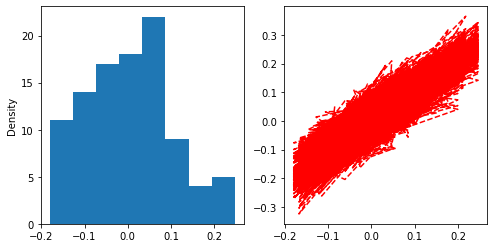

In [35]:
x = np.random.normal(0, 0.1, 100)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax1.hist(x, bins='auto', label=('x', 'y'))
ax1.set_ylabel('Density')
ax1.yaxis.set_major_locator(MultipleLocator(5))

guss = np.ndarray(shape = (100,100))
std = 1.06 * 0.1 * np.power(x.size, -1/5)
#guss = norm.pdf(x, loc = 0, scale = std)
for i in range(len(x)):
    guss[i] = np.random.normal(x[i], std, 100)   
ax2.plot(x, guss, 'r--')


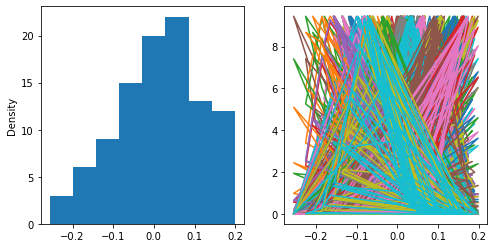

In [17]:
x = np.random.normal(0, 0.1, 100)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax1.hist(x, bins='auto', label=('x', 'y'))
ax1.set_ylabel('Density')
ax1.yaxis.set_major_locator(MultipleLocator(5))

std = 1.06 * 0.1 * np.power(x.size, -1/5)
for i in range(len(x)):
    ax2.plot(x, norm.pdf(x, loc = x[i], scale = std))
    
#guss = []
#for j in range(len(x)):
 #   guss = norm.pdf(x, loc = x[i], scale = std)
#np.sum(guss) 
#scipy.integrate.trapz(y = , x = )

In [ ]:
from matplotlib import pyplot as pp

x = np.random.randn(10000)
counts,bin_edges = np.histogram(x,20)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
err = np.random.rand(bin_centres.size)*100
pp.errorbar(bin_centres, counts, yerr=err, fmt='o')

pp.show()

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

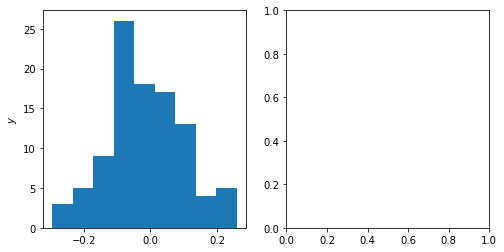

In [3]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

mu, sigma = 0, 0.1 # mean and standard deviation
x = np.random.normal(mu, sigma, 100)

ax1.hist(x, bins='auto', label=('x', 'y'))
ax1.set_ylabel('$y$')

std = 1.06 * sigma * np.power(len(x), -1/5 )

for i in range(len(x)):
    guss = norm.pdf(x[i], loc = x[i], scale = std)

ax2.plot(x, guss,
       'r-', lw=5, alpha=0.6, label='norm pdf')

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

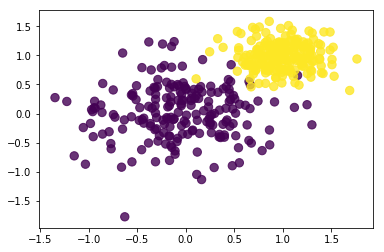

In [4]:
#! curl https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

In [37]:

mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, (5,5))
data1 , data2 = data.T
df1 = pd.DataFrame(data1, index = [0,1,2,3,4])
df2 = pd.DataFrame(data2, index = [5,6,7,8,9])
    
#df3 = df3.join(df1.assign(tmp=1), df2.assign(tmp=1), how = 'right', on='tmp')
#df3
df3 = pd.concat([df1, df2])
df3.T

#sns.relplot(df3[0:5], df3[5:10], hue = df3['tmp'], data = df3);
#sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

,0,1,2,3,4,5,6,7,8,9
0,0.280995,-0.638165,-0.574914,0.930942,-0.760978,0.405194,1.589338,1.340023,0.987874,0.268845
1,-0.630662,-0.553853,0.878939,0.121509,-1.532244,1.751274,0.203242,1.416748,0.540513,-0.272738
2,-0.329123,-1.062400,0.713799,-0.465407,-1.072000,0.063377,-0.019788,2.223540,2.252617,0.406023
3,0.401167,0.909802,-0.624095,-0.570677,-0.168454,1.281797,0.511667,0.203747,-0.128797,0.370377
4,0.517632,-0.134519,0.337793,0.359500,0.138024,0.179953,-1.172770,0.433686,1.074990,0.334704


In [76]:
arrays1 = [np.array(['class1', 'class1', 'class1', 'class1', 'class1']),
          np.array(['one', 'two', 'three', 'four', 'five'])]
arrays2 = [np.array(['class2', 'class2', 'class2', 'class2', 'class2']),
          np.array(['one', 'two', 'three', 'four', 'five'])]

df1 = pd.DataFrame(np.random.normal(0, 0.1, size = (5,5)), index = arrays1)
df2 = pd.DataFrame(np.random.normal(1, 1, size = (5,5)), index = arrays2)
df0 = pd.DataFrame([1,1,1,1,1,0,0,0,0,0], columns = ['tmp'])
df = pd.concat([df1, df2])
df.T
sns.relplot(df.T['class1'], df.T['class2'], data = df.T);

ValueError: If using all scalar values, you must pass an index

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [45]:
data = np.load('residuals_261.npy', allow_pickle = True).item()
df = pd.DataFrame(data)

df0 = df[abs(df['residuals']) < 2]


slope, intercept, r_value, p_value, std_err = stats.linregress(df0['residuals'], df0['distances'])

#sns.jointplot(df2['residuals'], df2['distances'], data = df2, kind = 'reg')

#df0.sort_values(by = ['distances'])

In [46]:
x = np.linspace(0,20, num = 501)

df1 = pd.DataFrame({'aa':x[:-1], 'bb':x[1:]})
df3 = pd.merge(df1.assign(tmp=1), df0.assign(tmp=1), on='tmp')
df4 = df3[df3['distances'].between(df3['aa'], df3['bb'])]
df4 = df4.groupby(['distances'], as_index=False)['residuals'].mean()
df5 = df4.groupby(['distances'], as_index=False)['residuals'].std()

y = np.array(df4['residuals'])
erry = np.array(df5['residuals'])
